In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_movie_gross = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")

In [3]:
df_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [4]:
df_movie_domgross = df_movie_gross.dropna(subset=['domestic_gross'])

In [5]:
df_movie_domgross.shape

(3359, 5)

In [6]:
df_movie_gross_cleaned = df_movie_domgross.drop(columns=['studio','foreign_gross'])

In [7]:
df_tn_movie_budgets = pd.read_csv("./zippedData/tn.movie_budgets.csv.gz")

In [8]:
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [9]:
df_tn_movie_budgets_domgross = df_tn_movie_budgets.drop(columns=['worldwide_gross'])

In [10]:
df_tn_movie_budgets_domgross

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382"
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


In [11]:
df_tn_movie_budgets_domgross.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
dtype: int64

In [12]:
def clean_domgross(row):
    if isinstance(row,str):
        domestic_gross = row.replace('$', '')
        domestic_gross = int(domestic_gross.replace(',', ''))
    else:
        domestic_gross = None
    return domestic_gross

In [13]:

df_tn_movie_budgets_domgross['domestic_gross'] = df_tn_movie_budgets_domgross['domestic_gross'].apply(clean_domgross)

In [14]:
df_tn_movie_budgets_domgross

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0
5778,79,"Apr 2, 1999",Following,"$6,000",48482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0


In [15]:
df_tn_movie_budgets_domgross.sort_values('domestic_gross', ascending = False)

,id,release_date,movie,production_budget,domestic_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000",936662225
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625
41,42,"Feb 16, 2018",Black Panther,"$200,000,000",700059566
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482
42,43,"Dec 19, 1997",Titanic,"$200,000,000",659363944
...,...,...,...,...,...
2709,10,"Mar 31, 2004",The Touch,"$20,000,000",0
2708,9,"Apr 13, 2010",Three Kingdoms: Resurrection of the Dragon,"$20,000,000",0
2707,8,"Dec 31, 2012",Zambezia,"$20,000,000",0
2706,7,"Dec 31, 2008",Admiral,"$20,000,000",0


In [16]:
def clean_prodbud(row):
    if isinstance(row,str):
        production_budget = row.replace('$', '')
        production_budget = int(production_budget.replace(',', ''))
    else:
        production_budget = None
    return production_budget

In [17]:

df_tn_movie_budgets_domgross['production_budget'] = df_tn_movie_budgets_domgross['production_budget'].apply(clean_domgross)

In [18]:
df_tn_movie_budgets_domgross.head(10)

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295
9,10,"Nov 6, 2015",Spectre,300000000,200074175


In [19]:
df_tn_movie_budgets_head = df_tn_movie_budgets_domgross.head(10)

In [20]:
hbomax_data = pd.read_csv('./zippedData/HBO_MAX_Content.csv')

In [21]:
hbomax_df = hbomax_data.merge(df_movie_gross,how='inner')

In [22]:
hbomax_df

,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,genres_Animation,...,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm,studio,domestic_gross,foreign_gross
0,Wonder Woman,NaN,2017,PG-13/TV-14,7.4,93.0,2010-2019,7.01-7.50,1,0,...,0,0,0,0,0,0,0,WB,412600000.0,409300000
1,Wonder Woman,NaN,2017,PG-13/TV-14,7.4,93.0,2010-2019,7.01-7.50,1,1,...,0,0,0,0,0,0,0,WB,412600000.0,409300000
2,La La Land,NaN,2016,PG-13/TV-14,8.0,91.0,2010-2019,7.51-8.00,0,0,...,0,0,0,0,0,0,0,LG/S,151100000.0,295000000
3,Prisoners,NaN,2013,R/TV-MA,8.1,81.0,2010-2019,8.01-8.50,0,0,...,0,0,0,0,0,0,0,WB,61000000.0,61100000
4,X-Men: First Class,NaN,2011,PG-13/TV-14,7.7,86.0,2010-2019,7.51-8.00,1,0,...,0,0,0,0,0,0,0,Fox,146400000.0,207200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Holy Rollers,NaN,2010,R/TV-MA,5.9,52.0,2010-2019,5.01-6.00,0,0,...,0,0,0,0,0,0,0,FInd.,303000.0,305000
91,Incarnate,NaN,2016,PG-13/TV-14,5.3,18.0,2010-2019,5.01-6.00,0,0,...,0,0,0,0,0,0,0,BH Tilt,4800000.0,1500000
92,Alpha and Omega,NaN,2010,PG/TV-PG,5.2,16.0,2010-2019,5.01-6.00,1,1,...,0,0,0,0,0,0,0,LGF,25100000.0,25400000
93,Salinger,NaN,2013,PG-13/TV-14,6.7,36.0,2010-2019,6.01-7.00,0,0,...,0,0,0,0,0,0,0,Wein.,584000.0,67000


In [23]:
hbomax_merged_df = hbomax_df.merge(df_tn_movie_budgets,how='inner',
                       left_on= 'title',
                       right_on= 'movie')

In [24]:
def clean_domgross(row):
    if isinstance(row,str):
        domestic_gross_y = row.replace('$', '')
        domestic_gross_y = int(domestic_gross_y.replace(',', ''))
    else:
        domestic_gross_y = None
    return domestic_gross_y

In [25]:

hbomax_merged_df['domestic_gross_y'] = hbomax_merged_df['domestic_gross_y'].apply(clean_domgross)

In [26]:
def clean_prodbud(row):
    if isinstance(row,str):
        production_budget = row.replace('$', '')
        production_budget = int(production_budget.replace(',', ''))
    else:
        production_budget = None
    return production_budget

In [27]:

hbomax_merged_df['production_budget'] = hbomax_merged_df['production_budget'].apply(clean_prodbud)

In [33]:
hbomax_imdb_score_sorted_df = hbomax_merged_df.sort_values('imdb_score', ascending=False)

In [34]:
hbomax_imdb_score_sorted_head_df = hbomax_imdb_score_sorted_df.head(50)

In [35]:
hbomax_imdb_score_sorted_df.duplicated().sum()

0

In [36]:
hbomax_production_budget = hbomax_imdb_score_sorted_head_df['production_budget']

In [37]:
div_millions = hbomax_production_budget/1000000

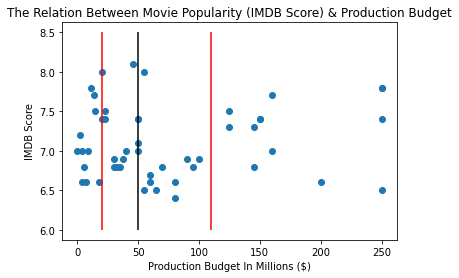

In [38]:
fig, ax = plt.subplots()


ax.scatter(div_millions, 
           hbomax_imdb_score_sorted_head_df['imdb_score']);

ax.vlines(x=20, ymin=6, ymax=8.5, colors='r'),
ax.vlines(x=50, ymin=6, ymax=8.5, colors='k'),
ax.vlines(x=110, ymin=6, ymax=8.5, colors='r')

ax.set_title("The Relation Between Movie Popularity (IMDB Score) & Production Budget")
plt.xlabel("Production Budget In Millions ($)")
plt.ylabel('IMDB Score')

plt.savefig('./Images/IMDB_Pop_Budget_Scatter')


plt.show()